In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_path = file_path = "C:\\Users\\karth\\Downloads\\bitcoin.csv"
df = pd.read_csv(file_path)


In [6]:
rows, cols = df.shape
print(f"Number of Rows: {rows}, Number of Columns: {cols}")

Number of Rows: 2713, Number of Columns: 7


In [7]:
data_nulls = df.isnull().sum() / len(df) * 100
print("Percentage of Nulls:")
print(data_nulls)
df_cleaned = df.dropna()

Percentage of Nulls:
Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64


In [8]:
duplicates_percentage = df.duplicated().sum() / len(df) * 100
print(f"Percentage of Duplicates: {duplicates_percentage:.2f}%")
df_cleaned = df_cleaned.drop_duplicates()

Percentage of Duplicates: 0.00%


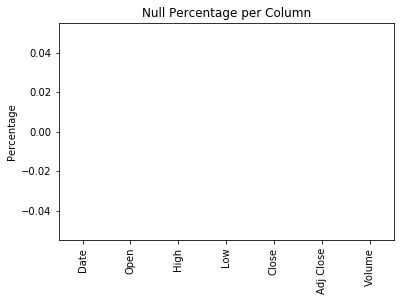

In [9]:
data_nulls.plot(kind='bar', title='Null Percentage per Column')
plt.ylabel('Percentage')
plt.show()

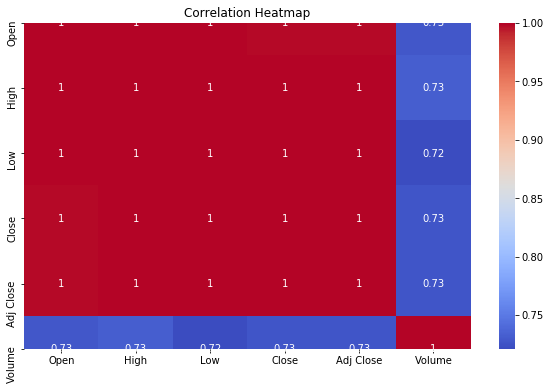

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

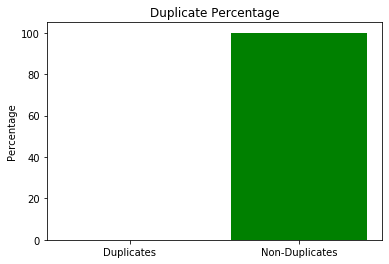

In [11]:
plt.figure(figsize=(6, 4))
plt.bar(['Duplicates', 'Non-Duplicates'], [duplicates_percentage, 100 - duplicates_percentage], color=['red', 'green'])
plt.title("Duplicate Percentage")
plt.ylabel("Percentage")
plt.show()


In [12]:
print(f"Final Rows: {df_cleaned.shape[0]}, Final Columns: {df_cleaned.shape[1]}")


Final Rows: 2713, Final Columns: 7


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [14]:
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns
if len(numerical_cols) > 1:
    target = numerical_cols[-1]  
    features = numerical_cols[:-1]
    
    X = df_cleaned[features]
    y = df_cleaned[target]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
 model = LinearRegression()
 model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
 y_pred = model.predict(X_test)

In [20]:
 mae = mean_absolute_error(y_test, y_pred)
 mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
    

Mean Absolute Error: 9507474077.25
Mean Squared Error: 311750743239350026240.00


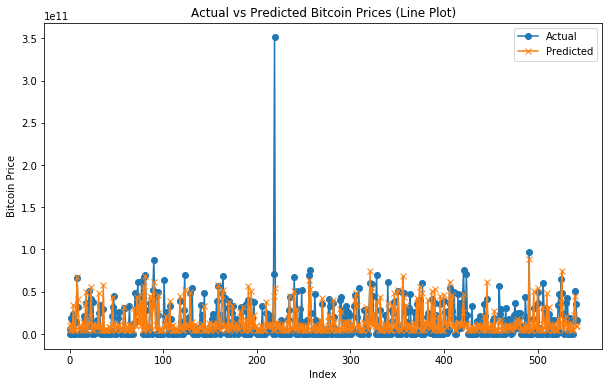

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual', marker='o')
plt.plot(range(len(y_pred)), y_pred, label='Predicted', marker='x')
plt.xlabel("Index")
plt.ylabel("Bitcoin Price")
plt.title("Actual vs Predicted Bitcoin Prices (Line Plot)")
plt.legend()
plt.show()